### **Description** In this project I will show a prediction for portuges red wine quality using the best machine learning model after compared them by their accuracy, Precision Score, Recall score and F1 score.our Dataset is collected by Professor Paulo Cortez, University of Minho,which have 1599 rows and 12 columns.To do the analysis I will pass through the following steps first I will Import the necessary Libraries then I will load my dataset and tries to see the shape ,check if there is a null value and the types of the dataset.then I will try to check the correlations b/n the attributes using different visualization mechanisms.After that using PCA and K-means clusttering model I will classify and visualize them.the next step will train and test the data to be fit plus checking wheather the dataset is ballanced or not.after I balance the dataset we will try to implement our selected Machine learning Algorithsm to choose the best fitted one.our selected machine learning Models to be implement will be Logistic Regression, KNN,SVM and Random forest.based on their Accuracy ,Precision Score, Recall score and F1 score we will choose one of them and apply the selected model to predict our Red Wine Pridiction. Finally we will give it some random values from the dataset to predict then we will see how it performs.


## **Import the required Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

### **Loadind The Dataset**

In [2]:
df = pd.read_csv("/content/winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df.shape

(1599, 12)

In [4]:
df.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [9]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

### **Visualization**

<Axes: >

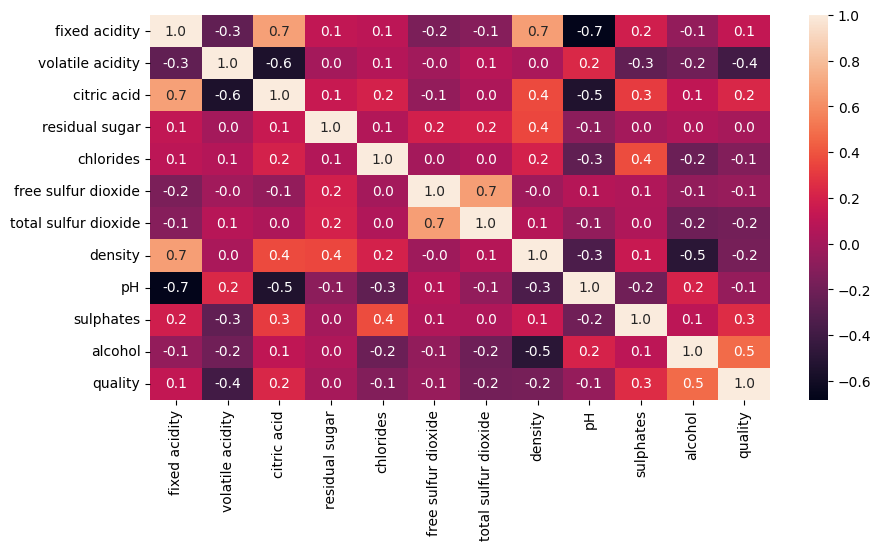

In [10]:
import seaborn as sns
plt.figure(figsize=(10,5)) # this shows us the density of the relationships of the attributes using heatmap visualization
sns.heatmap(df.corr(),annot=True,fmt='0.1f')

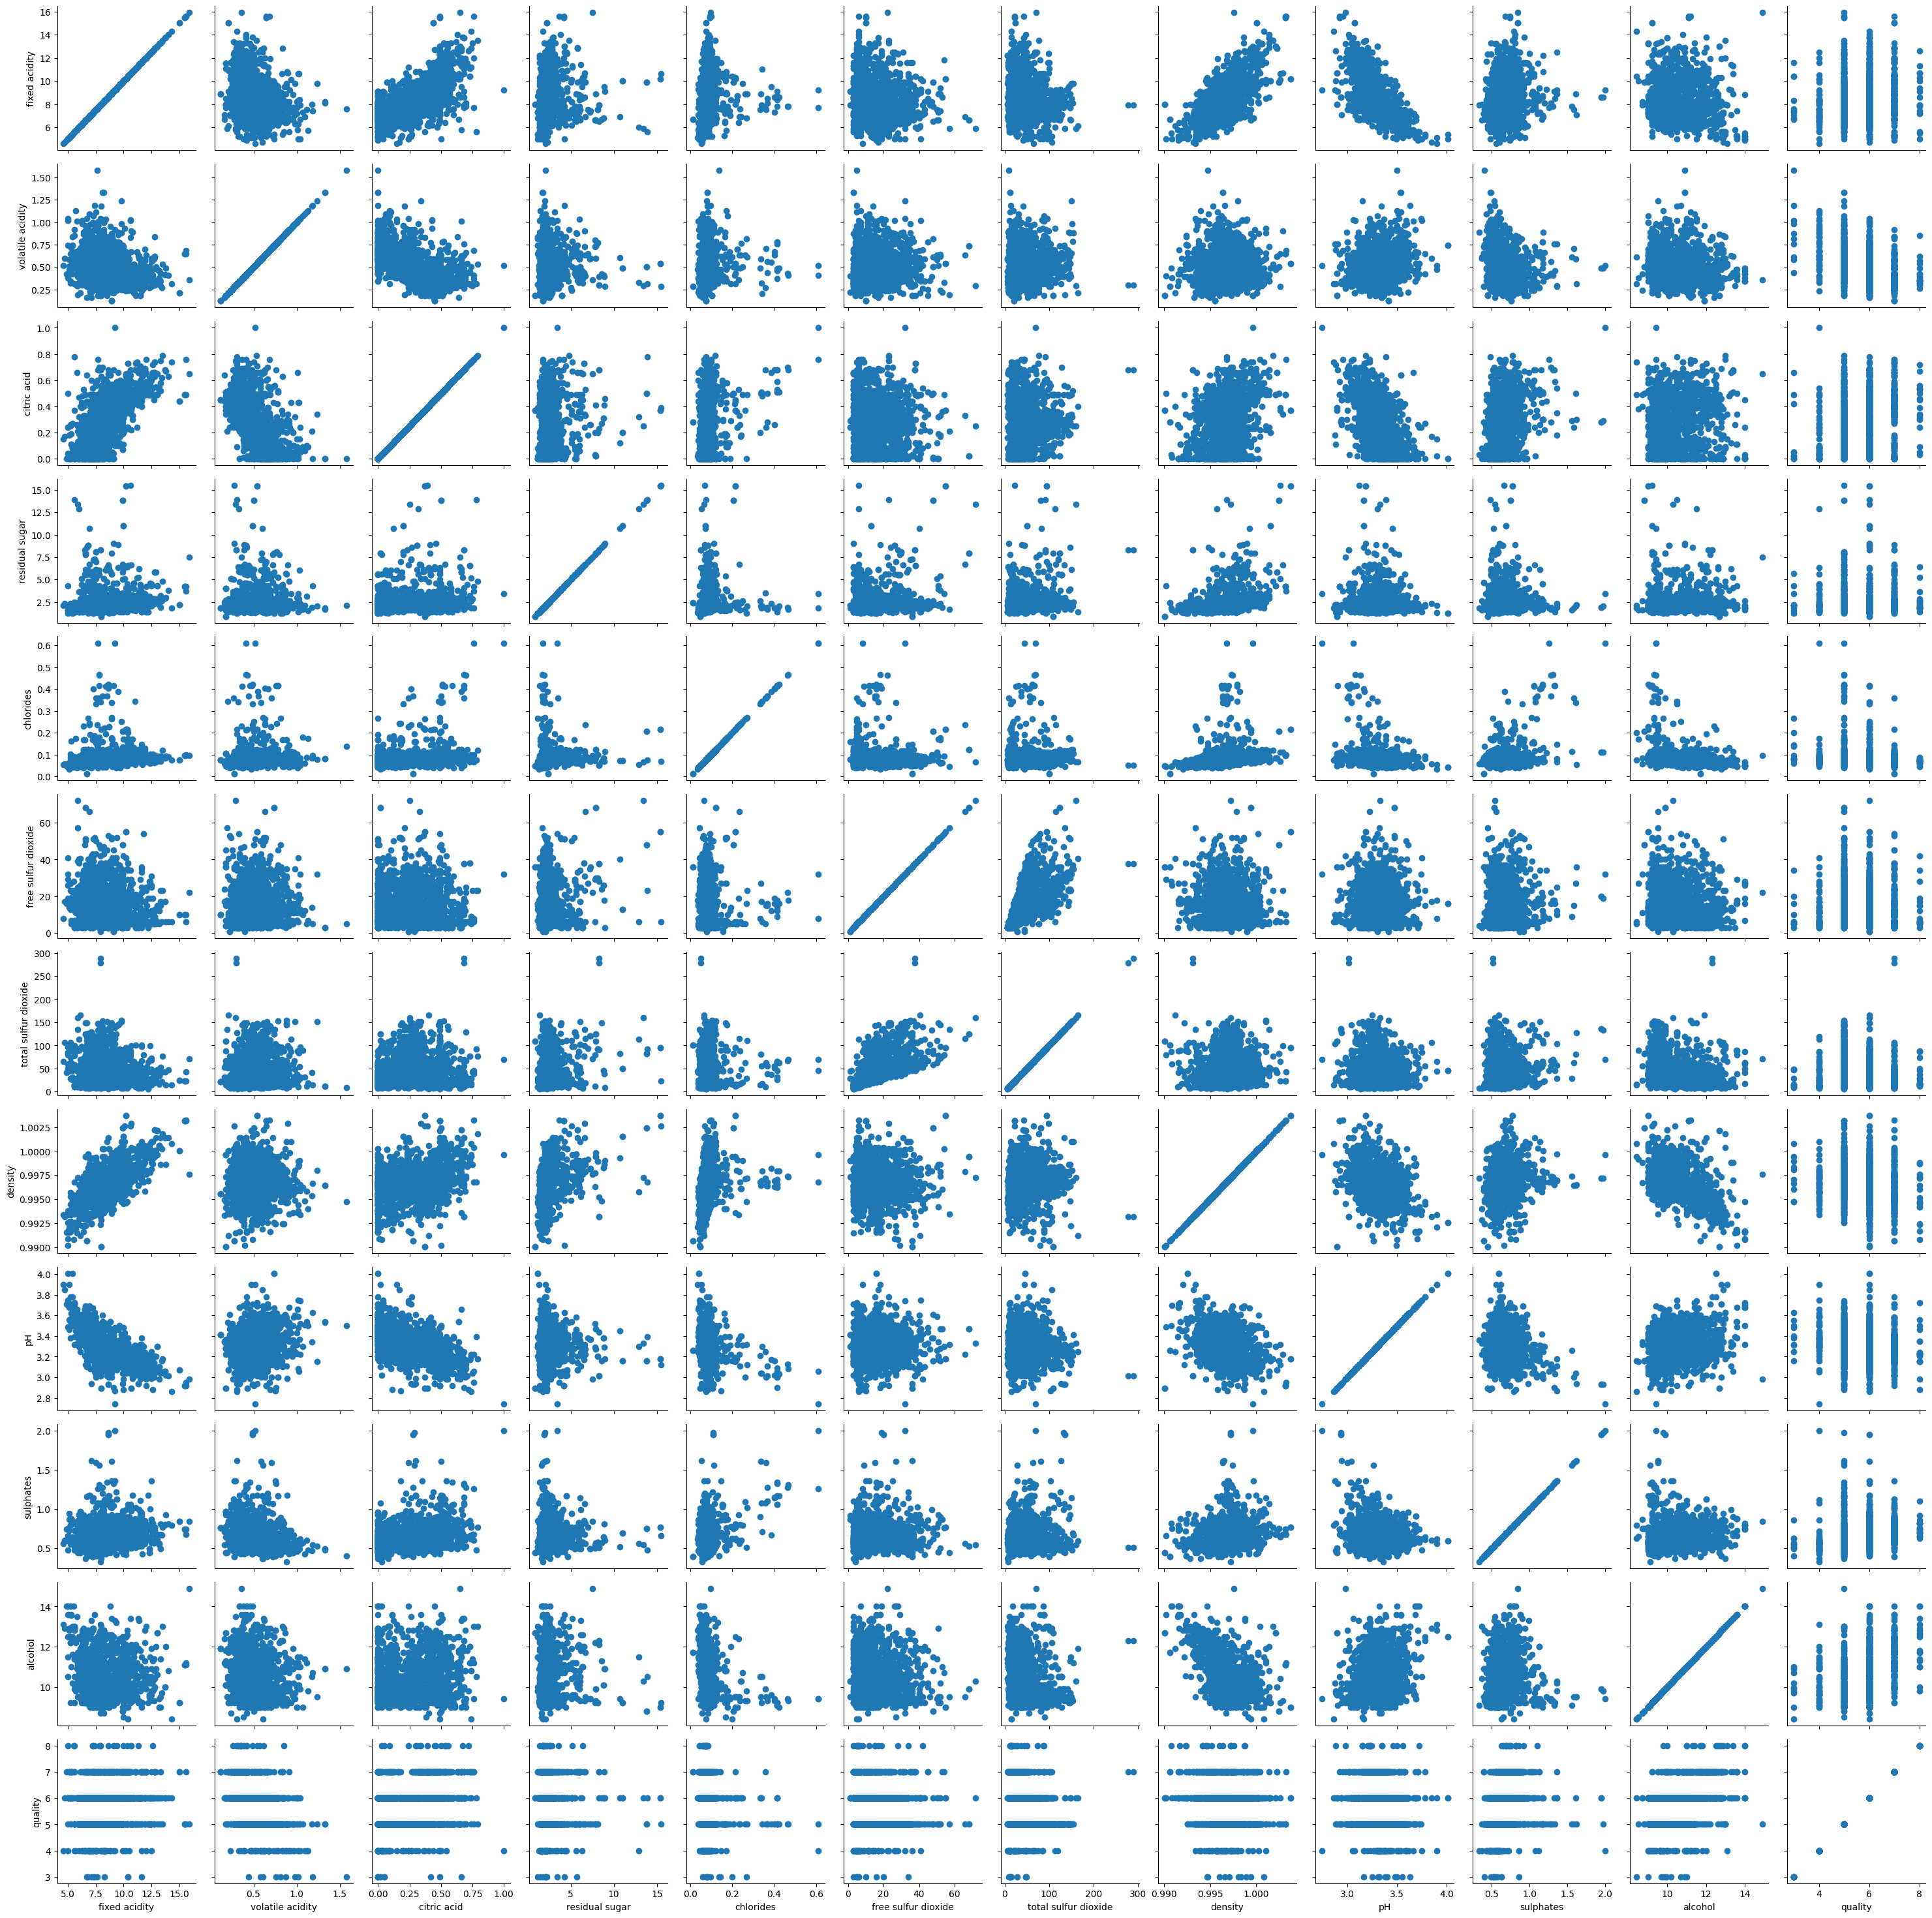

In [11]:
x= sns.PairGrid(df)
x = x.map(plt.scatter)

In [12]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

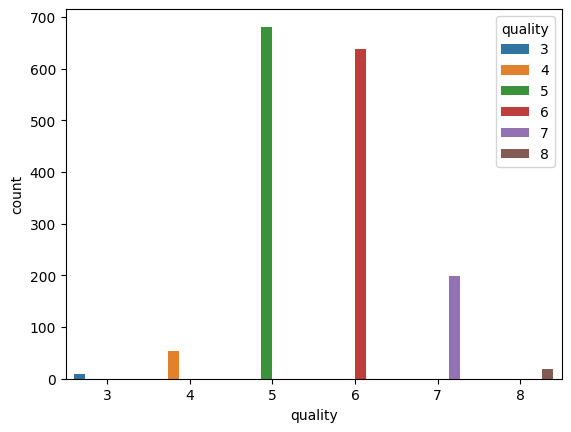

In [13]:
count=df["quality"].value_counts()
sns.countplot(x="quality", hue="quality", data=df);

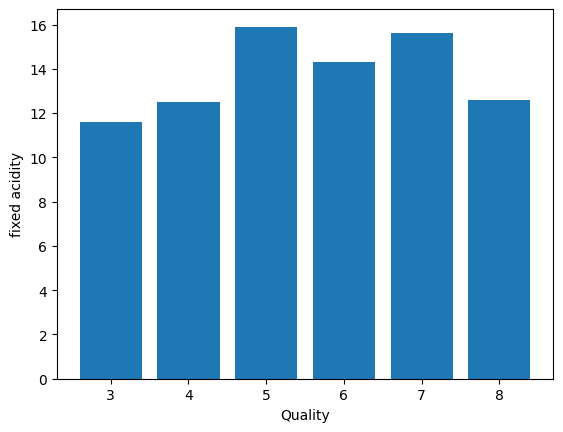

In [14]:
plt.bar(df['quality'],df['fixed acidity']) # to compare the quality of the wine with the fixed acidity and we can also do this for the r/ships b/n qualiy versus the other attributes
plt.xlabel('Quality')
plt.ylabel('fixed acidity')
plt.show()

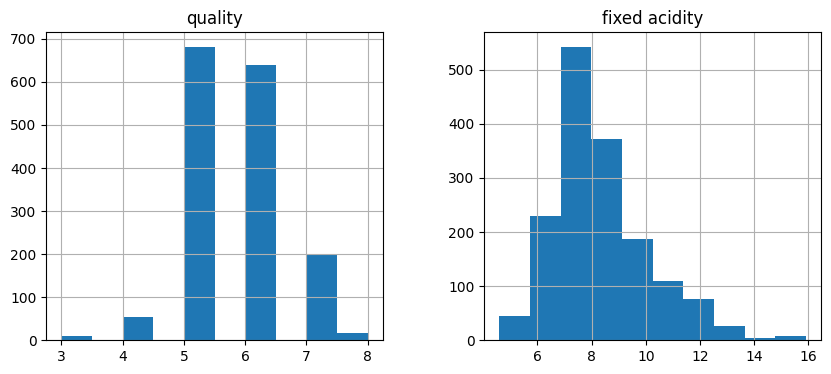

In [15]:
features = ["quality", "fixed acidity"]
df[features].hist(figsize=(10, 4));

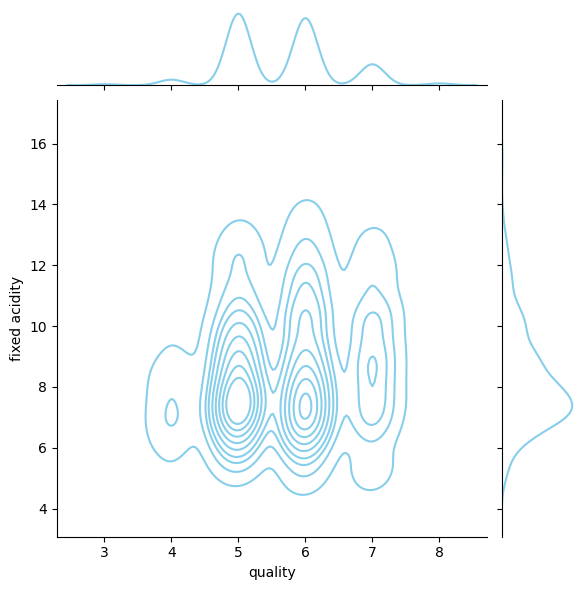

In [16]:
df = pd.DataFrame(df, columns=['quality', 'fixed acidity'])
sns.jointplot(data=df, x='quality', y='fixed acidity', kind='kde', color='skyblue')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

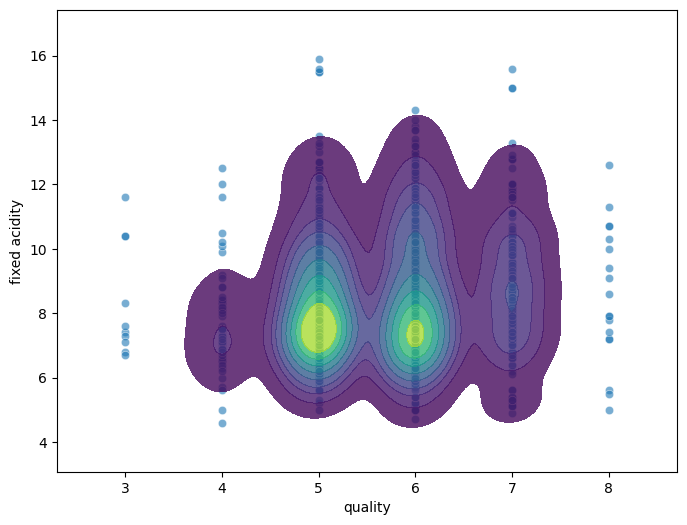

In [17]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='quality', y='fixed acidity', alpha=0.6)
sns.kdeplot(data=df, x='quality', y='fixed acidity', cmap='viridis', alpha=0.8, fill=True)
plt.show

# We can visualize the other attiributes like we did it for fixed acidity vs quality

### **Clustering**

In [18]:
df = pd.read_csv("/content/winequality-red.csv")

In [19]:
y = df['quality']
X = df.drop('quality', axis=1)

In [20]:
scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


In [21]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308


In [22]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6)

In [23]:
clusters = kmeans.predict(X)
clusters

array([1, 1, 1, ..., 0, 1, 0], dtype=int32)

In [24]:
pca = PCA(n_components=2) # we have two dimensions to display the visulaization so we r changing our data into two dimensional data pc1 pc2

reduced_X = pd.DataFrame(pca.fit_transform(X), columns=["PC1", "PC2"])
reduced_X

,PC1,PC2
0,-1.619530,0.450950
1,-0.799170,1.856553
2,-0.748479,0.882039
3,2.357673,-0.269976
4,-1.619530,0.450950
...,...,...
1594,-2.150500,0.814286
1595,-2.214496,0.893101
1596,-1.456129,0.311746
1597,-2.270518,0.979791


In [25]:
reduced_X['cluster'] = clusters
reduced_X.head(20)

,PC1,PC2,cluster
0,-1.619530,0.450950,1
1,-0.799170,1.856553,1
2,-0.748479,0.882039,1
3,2.357673,-0.269976,2
4,-1.619530,0.450950,1
5,-1.583707,0.569195,1
6,-1.101464,0.608015,1
7,-2.248708,-0.416835,1
8,-1.086887,-0.308569,1
9,0.654790,1.665207,5


In [26]:
reduced_centers = pca.transform(kmeans.cluster_centers_)
reduced_centers

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


array([[-1.28009936, -1.07908962],
       [-1.08009172,  0.02048908],
       [ 2.10942083, -0.98427426],
       [ 0.11320064,  1.47722428],
       [ 3.52834398,  1.01049765],
       [ 1.53399728,  3.51216907]])

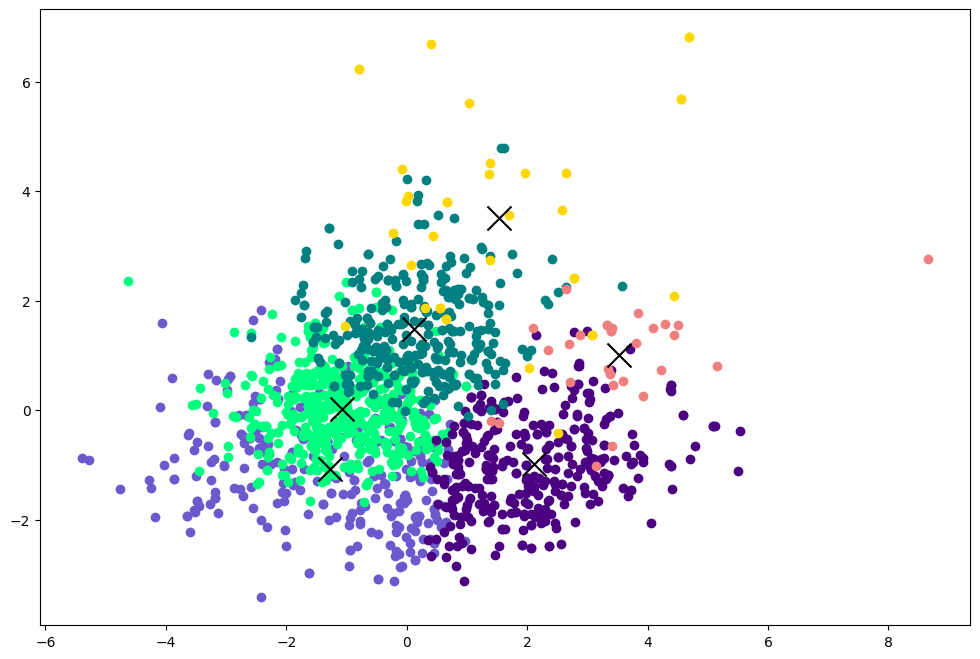

In [27]:
plt.figure(figsize=(12, 8))

plt.scatter(reduced_X[reduced_X['cluster'] == 0].loc[:, 'PC1'], reduced_X[reduced_X['cluster'] == 0].loc[:, 'PC2'], color='slateblue')
plt.scatter(reduced_X[reduced_X['cluster'] == 1].loc[:, 'PC1'], reduced_X[reduced_X['cluster'] == 1].loc[:, 'PC2'], color='springgreen')
plt.scatter(reduced_X[reduced_X['cluster'] == 2].loc[:, 'PC1'], reduced_X[reduced_X['cluster'] == 2].loc[:, 'PC2'], color='indigo')
plt.scatter(reduced_X[reduced_X['cluster'] == 3].loc[:, 'PC1'], reduced_X[reduced_X['cluster'] == 3].loc[:, 'PC2'], color='teal')
plt.scatter(reduced_X[reduced_X['cluster'] == 4].loc[:, 'PC1'], reduced_X[reduced_X['cluster'] == 4].loc[:, 'PC2'], color='lightcoral')
plt.scatter(reduced_X[reduced_X['cluster'] == 5].loc[:, 'PC1'], reduced_X[reduced_X['cluster'] == 5].loc[:, 'PC2'], color='gold')

plt.scatter(reduced_centers[:, 0], reduced_centers[:, 1], color='black', marker='x', s=300)

plt.show()

### **Training or Dataset**

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

# MLPs are suitable for classification prediction problems where inputs are assigned a class or label. They are also suitable for regression prediction problems where a real-valued quantity is predicted given a set of inputs.

In [29]:
model = MLPClassifier(hidden_layer_sizes=(256, 256), max_iter=500)

model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(256, 256), max_iter=500)

In [30]:
print(f"Model Accuracy: {model.score(X_test, y_test)}")

Model Accuracy: 0.6375


In [31]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [32]:
df['quality'].unique() #For checking the number of classes

array([5, 6, 7, 4, 8, 3])

In [33]:
df['quality']=[1 if x>=7 else 0 for x in df['quality']]

In [34]:
df['quality'].unique()

array([0, 1])

In [35]:
df['quality'].value_counts() #to show our dataset structure

0    1382
1     217
Name: quality, dtype: int64

<Axes: xlabel='quality', ylabel='count'>

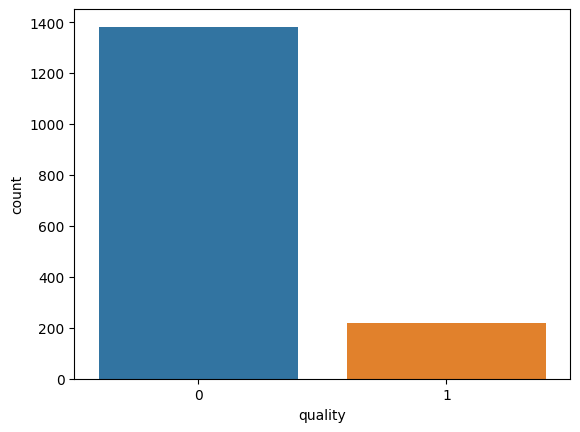

In [36]:
sns.countplot(x=df["quality"]) #to show the unbalanced dataset

### As we can see that the dataset that we have isn`t Balance. first we will show that the result with the unbalance dataset and we will make it balance and see what will happen next

### **Store Feature Matrix In X And Response (Target) In Vector y**

In [37]:
X = df.drop('quality',axis=1)
y = df['quality']

In [38]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [39]:
y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    1
9    0
Name: quality, dtype: int64

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

### **Featuring Scaling**

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
st  =StandardScaler()
X_train = st.fit_transform(X_train)
X_test = st.transform(X_test)

In [44]:
X_train

array([[ 0.21833164,  0.88971201,  0.19209222, ...,  1.09349989,
         0.45822284,  1.12317723],
       [-1.29016623, -1.78878251,  0.65275338, ..., -0.40043872,
        -0.40119696,  1.40827174],
       [ 1.49475291, -0.78434707,  1.01104539, ..., -0.07566946,
         0.51551749, -0.58738978],
       ...,
       [-0.65195559,  0.49909822, -1.08752211, ...,  1.28836145,
        -0.68767023, -0.87248428],
       [-0.24582155, -1.84458448,  0.39683051, ...,  0.05423824,
         0.80199076,  1.40827174],
       [-1.46422367, -1.34236676, -0.06383064, ...,  0.50891521,
        -0.68767023,  2.92877575]])

### **Applying PCA(Principal component Analysis)**

In [45]:
from sklearn.decomposition import PCA

In [46]:
pca = PCA(n_components=0.90) # we retain 90% of our Data

In [47]:
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [48]:
pca.explained_variance_ratio_ #we only comes with seven components here

array([0.2801769 , 0.17563995, 0.13957636, 0.11081822, 0.09021248,
       0.05908698, 0.05266627])

In [49]:
sum(pca.explained_variance_ratio_)

0.9081771725272516

### **Logistic Regression**

In [50]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [51]:
y_pred1 = log.predict(X_test)

In [52]:
from sklearn.metrics import accuracy_score

In [53]:
accuracy_score(y_test,y_pred1)

0.853125

In [54]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [55]:
precision_score(y_test,y_pred1)

0.5

In [56]:
recall_score(y_test,y_pred1)

0.2765957446808511

In [57]:
f1_score(y_test,y_pred1)

0.3561643835616438

### **From our result we can see that our Prececision_score, recall_score and f1_score is very low when we compare it to the accracy,It is because of the Unbalanced dataset that we were not handle so,now we should handle it before we do the best method selcection and apply on that method**

## **Next we try to balance it for Handling the data properly**

## **For Unbalanced data we have to check for Precesion,Recall and f1_Score b/C it is very dengerous to calculate Accuracy in an Unbalanced Dataset so, We are going to handle the unbalanced dataset using SMOTE(Synthetic Minority Oversampling Technique) this technique will allow us to include more data into our calculation so, we are not gonna loss any information.**

In [58]:
from imblearn.over_sampling import SMOTE

In [59]:
X_res,y_res = SMOTE().fit_resample(X,y)

In [60]:
y_res.value_counts()

0    1382
1    1382
Name: quality, dtype: int64

### **As we can see now our dataset is balanced and we can continue the calculation**

## **Next,Splitting The Dataset Into The Training Set And Test Set**

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.20,random_state=42)

### **Feature Scaling**

In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
st  =StandardScaler()
X_train = st.fit_transform(X_train)
X_test = st.transform(X_test)

In [65]:
X_train

array([[ 1.03029978, -0.55694846,  0.73846758, ..., -1.18211959,
        -0.28681736,  0.82819686],
       [ 0.95281165, -0.99577621,  0.61876382, ..., -1.36206623,
        -0.24199687,  0.35871241],
       [ 0.70296661,  2.42351286, -0.36059942, ...,  0.75317657,
        -0.17643345,  0.27558949],
       ...,
       [ 0.31275928,  0.76295068, -1.66109123, ..., -0.80927971,
        -0.42958168, -0.43838894],
       [-0.18893585,  0.97052095, -1.14089451, ..., -0.06201801,
         0.329863  ,  0.00784758],
       [-0.74637488,  0.88156226, -1.3489732 , ...,  1.43250539,
        -0.99916519, -1.24161467]])

In [66]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


### **Applying PCA for dimension reduction**

In [67]:
from sklearn.decomposition import PCA

In [68]:
pca = PCA(n_components=0.90) # I want to retain 90% my data

In [69]:
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [70]:
pca.explained_variance_ratio_

array([0.29088609, 0.18619546, 0.14383156, 0.10487582, 0.08661433,
       0.05973347, 0.04618417])

In [71]:
sum(pca.explained_variance_ratio_)

0.9183208861082777

### **Logistic Regression LR**

In [72]:
from sklearn.linear_model import LogisticRegression

In [73]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [74]:
y_pred1 = log.predict(X_test)

In [75]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [76]:
accuracy_score(y_test,y_pred1)

0.8083182640144665

In [77]:
precision_score(y_test,y_pred1)

0.7727272727272727

In [78]:
recall_score(y_test,y_pred1)

0.8435114503816794

In [79]:
f1_score(y_test,y_pred1)

0.8065693430656934

In [80]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred1 = logreg.predict(X_test)
logreg_acc = accuracy_score(y_pred1,y_test)
print("test accouracy is: {:.2f}%".format(logreg_acc*100))

test accouracy is: 80.83%


In [81]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.85      0.78      0.81       291
           1       0.77      0.84      0.81       262

    accuracy                           0.81       553
   macro avg       0.81      0.81      0.81       553
weighted avg       0.81      0.81      0.81       553



TN : 226
FN : 41
TP : 221
FP : 65


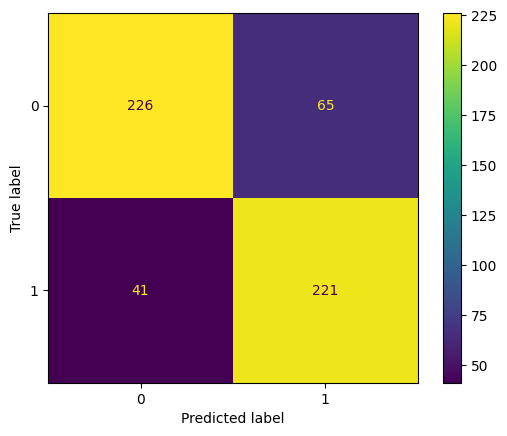

In [82]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
style.use('default')
cm = confusion_matrix(y_test, y_pred1, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=logreg.classes_)
disp.plot()
print("TN :",cm[0][0])
print("FN :",cm[1][0])
print("TP :",cm[1][1])
print("FP :",cm[0][1])

### **As we can see here all the Precision , Recall and f1_score values are approximately in good values w.r.t the accuracy score so, now we can proceed with the handled dataset for the rest of the methods**

### **SVM(Support Vector Machine)**

In [83]:
from sklearn import svm

In [84]:
svm = svm.SVC()

In [85]:
svm.fit(X_train,y_train)

SVC()

In [86]:
y_pred2 = svm.predict(X_test)

In [87]:
accuracy_score(y_test,y_pred2)

0.8770343580470162

In [88]:
precision_score(y_test,y_pred2)

0.819078947368421

In [89]:
recall_score(y_test,y_pred2)

0.950381679389313

In [90]:
f1_score(y_test,y_pred2)

0.8798586572438163

In [91]:
svm.fit(X_train,y_train)
y_pred2 = svm.predict(X_test)
svm_acc = accuracy_score(y_test,y_pred2)
print("test accouracy is: {:.2f}%".format(svm_acc*100))

test accouracy is: 87.70%


In [92]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.95      0.81      0.87       291
           1       0.82      0.95      0.88       262

    accuracy                           0.88       553
   macro avg       0.88      0.88      0.88       553
weighted avg       0.89      0.88      0.88       553



TN:  236
FN:  13
TP:  249
FP:  55


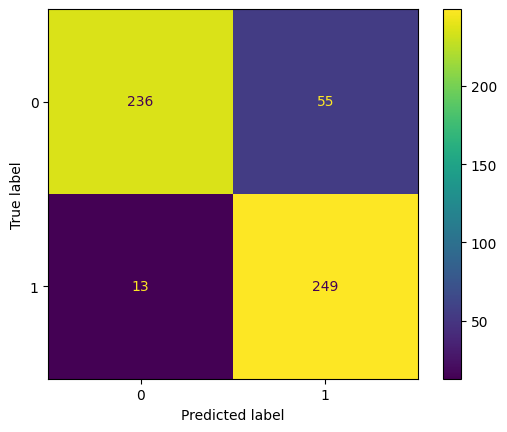

In [93]:
style.use('default')
cm = confusion_matrix(y_test, y_pred2, labels=svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=svm.classes_)
disp.plot()
print("TN: ", cm[0][0])
print("FN: ", cm[1][0])
print("TP: ", cm[1][1])
print("FP: ", cm[0][1])

### **KNeighbors Classifier(KNN)**

In [94]:
knn = KNeighborsClassifier()

In [95]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [96]:
y_pred3 = knn.predict(X_test)

In [97]:
accuracy_score(y_test,y_pred3)

0.8842676311030742

In [98]:
precision_score(y_test,y_pred3)

0.8113207547169812

In [99]:
recall_score(y_test,y_pred3)

0.9847328244274809

In [100]:
f1_score(y_test,y_pred3)

0.8896551724137931

In [101]:
knn.fit(X_train,y_train)
y_pred3 = knn.predict(X_test)
knn_acc = accuracy_score(y_test,y_pred3)
print("test accouracy is: {:.2f}%".format(knn_acc*100))

test accouracy is: 88.43%


In [102]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.98      0.79      0.88       291
           1       0.81      0.98      0.89       262

    accuracy                           0.88       553
   macro avg       0.90      0.89      0.88       553
weighted avg       0.90      0.88      0.88       553



TN:  231
FN:  4
TP:  258
FP:  60


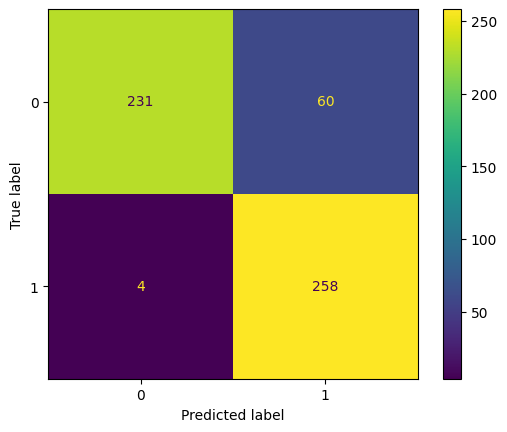

In [103]:
style.use('default')
cm = confusion_matrix(y_test, y_pred3, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=knn.classes_)
disp.plot()
print("TN: ", cm[0][0])
print("FN: ", cm[1][0])
print("TP: ", cm[1][1])
print("FP: ", cm[0][1])

### **Random Forest(RF) Classifier**

In [104]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [105]:
y_pred4 = rf.predict(X_test)

In [106]:
accuracy_score(y_test,y_pred4)

0.9168173598553345

In [107]:
precision_score(y_test,y_pred4)

0.8776223776223776

In [108]:
recall_score(y_test,y_pred4)

0.9580152671755725

In [109]:
f1_score(y_test,y_pred4)

0.9160583941605839

In [110]:
rforest = RandomForestClassifier()
rforest.fit(X_train, y_train)
y_pred4 = rforest.predict(X_test)
rforest_acc = accuracy_score(y_pred4, y_test)
print("Test accuracy: {:.2f}%".format(rforest_acc*100))

Test accuracy: 91.68%


In [111]:
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92       291
           1       0.88      0.95      0.92       262

    accuracy                           0.92       553
   macro avg       0.92      0.92      0.92       553
weighted avg       0.92      0.92      0.92       553



TN:  257
FN:  12
TP:  250
FP:  34


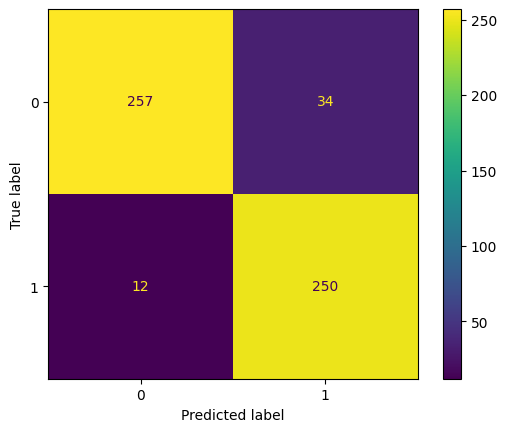

In [112]:
style.use('default')
cm = confusion_matrix(y_test, y_pred4, labels=rforest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=rforest.classes_)
disp.plot()
print("TN: ", cm[0][0])
print("FN: ", cm[1][0])
print("TP: ", cm[1][1])
print("FP: ", cm[0][1])

In [113]:
final_data = pd.DataFrame({'Models':['LR','SVC','KNN','RF'],
             'ACC':[accuracy_score(y_test,y_pred1)*100,
                   accuracy_score(y_test,y_pred2)*100,
                   accuracy_score(y_test,y_pred3)*100,
                   accuracy_score(y_test,y_pred4)*100]})

In [114]:
final_data

,Models,ACC
0,LR,80.831826
1,SVC,87.703436
2,KNN,88.426763
3,RF,91.681736


<Axes: xlabel='Models', ylabel='ACC'>

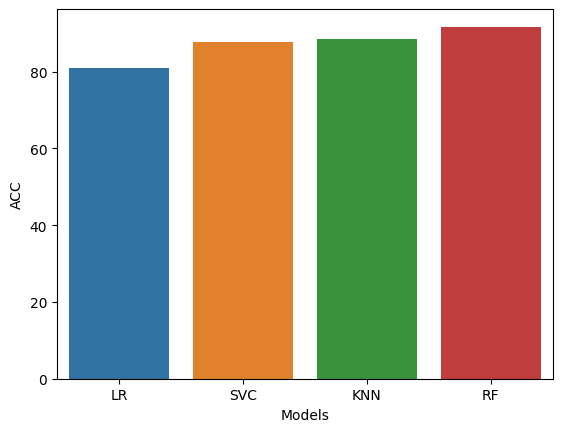

In [115]:
sns.barplot(x=final_data['Models'],y=final_data['ACC'])

### **Save Models**

In [116]:
X = df.drop('quality',axis=1)
y = df['quality']

In [117]:
from imblearn.over_sampling import SMOTE #to include the minority values
X_res,y_res = SMOTE().fit_resample(X,y)

In [118]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
X = st.fit_transform(X_res)

In [119]:
X = pca.fit_transform(X)

In [120]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X,y_res)

RandomForestClassifier()

In [121]:
import joblib  #Joblib is a Python library for running computationally intensive tasks in parallel. It provides a set of functions for performing operations in parallel on large data sets and for caching the results of computationally expensive functions.

In [122]:
joblib.dump(rf,'wine_quality_prediction')

['wine_quality_prediction']

In [123]:
model = joblib.load('wine_quality_prediction')

In [124]:
import pandas as pd
new_data = pd.DataFrame({
    'fixed acidity':7.3,
    'volatile acidity':0.65,
    'citric acid':0.00,
    'residual sugar':1.2,
    'chlorides':0.065,
    'free sulfur dioxide':15.0,
    'total sulfur dioxide':21.0,
    'density':0.9946,
    'pH':3.39,
    'sulphates':0.47,
    'alcohol':10.0,

},index=[0])

### We are now giving the system the new values to predict

In [125]:
new_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0


In [126]:
test = pca.transform(st.transform(new_data))

In [127]:
p = model.predict(test)

In [128]:
if p[0] == 1:
    print("Good Quality Wine")
else:
    print("Bad Quality Wine")

Good Quality Wine
